# SUPPORT VECTOR MACHINE
Menggunakan Dataset Mobile Price(Data harga Produk HandPhone)

In [53]:
#Import Library
import numpy as np # Aljabar Linear
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os

**DATA PREPROCESSING**

DataSet yang digunakan adalah merujuk pada Kaggle, berikut referensi dataset yang digunakan

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

Data ini terdapat sebanyak 23 kolom dan hampir 2000 baris

In [54]:
# Menampilkan isi directory
print(os.listdir("C:/Users/User/Kecerdasan Buatan/UTS Kecerdasan Buatan/input"))

['test.csv', 'train.csv']


In [9]:
#menampilkan data dan import dataset
df = pd.read_csv('C:/Users/User/Kecerdasan Buatan/UTS Kecerdasan Buatan/input/train.csv')
test = pd.read_csv('C:/Users/User/Kecerdasan Buatan/UTS Kecerdasan Buatan/input/test.csv')
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [8]:
#menampilkan jumlah data training
df.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [10]:
# Memeriksa nilai kosong di data training
df.isnull().sum().max()
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**TARGET VALUE ANALYSIS**

In [11]:
#memahami nilai prediksi
df['price_range'].describe(), df['price_range'].unique()
#disini mempredeksi nilai sebanyak 4 jenis

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64, array([1, 2, 3, 0], dtype=int64))

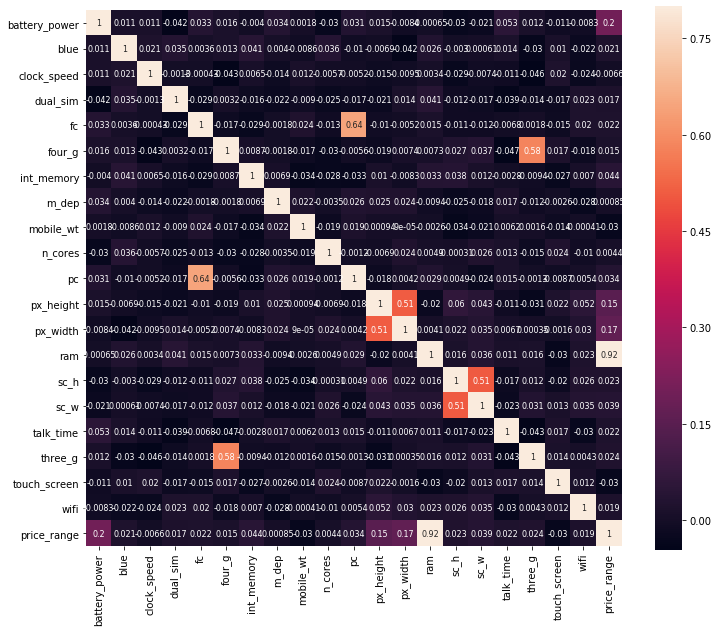

In [12]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

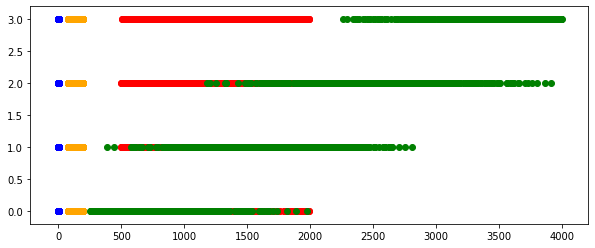

In [13]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'],x=df['battery_power'],color='red')
plt.scatter(y=df['price_range'],x=df['ram'],color='Green')
plt.scatter(y=df['price_range'],x=df['n_cores'],color='blue')
plt.scatter(y=df['price_range'],x=df['mobile_wt'],color='orange')
# dengan jelas kita dapat melihat bahwa setiap kategori memiliki rangkaian rentang nilai yang berbeda

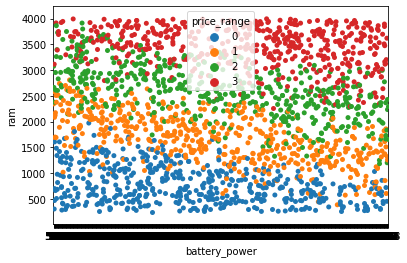

In [15]:
# PLot dengan menggunakan seaborn
sns.swarmplot(x='battery_power',y='ram',data=df,hue='price_range')
plt.show()

# **SUPPORT VECTOR MACHINES AND METHODS : **

Sekarang menggunakan metode Support Vector Machines(SVM) untuk memprediksi output dari dataset

In [18]:
# Import library untuk membagi data training dan data test
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [19]:
# Proses membagi dan menampilkan data yang akan ditraining dan data yang akan ditest
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [27]:
# Proses Training
for this_C in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:2, training score :0.959375 , Test Score: 0.975000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:4, training score :0.968125 , Test Score: 0.972500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:6, training score :0.969375 , Test Score: 0.980000 

Linear SVM value of C:7, training score :0.970625 , Test Score: 0.967500 

Linear SVM value of C:8, training score :0.975000 , Test Score: 0.967500 

Linear SVM value of C:9, training score :0.975000 , Test Score: 0.962500 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:20, training score :0.980000 , Test Score: 0.967500 

Linear SVM value of C:30, training score :0.981250 , Test Score: 0.960000 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C

In [28]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))

The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


In [29]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.25
Test Stratergy :stratified 
 Score :0.25
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.27
Test Stratergy :uniform 
 Score :0.24


In [30]:
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


In [31]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

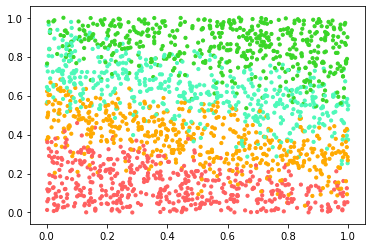

In [32]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

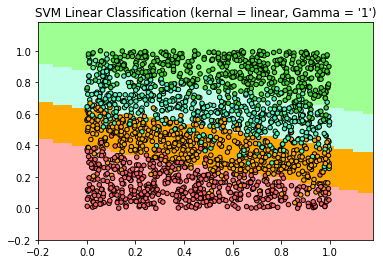

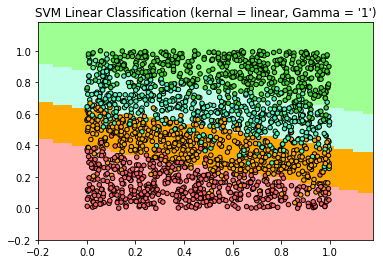

In [33]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [34]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [36]:
# Linear Support vector machine dengan hanya C sebagai parameter 
from sklearn.svm import LinearSVC

for this_C in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))



Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 

Linear SVM value of C:2, training score :0.856875 , Test Score: 0.850000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:4, training score :0.865625 , Test Score: 0.867500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:5, training score :0.867500 , Test Score: 0.870000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:6, training score :0.870000 , Test Score: 0.875000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:7, training score :0.871250 , Test Score: 0.877500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:8, training score :0.874375 , Test Score: 0.875000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:9, training score :0.875625 , Test Score: 0.880000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:10, training score :0.874375 , Test Score: 0.877500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:20, training score :0.879375 , Test Score: 0.875000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:30, training score :0.855000 , Test Score: 0.855000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:40, training score :0.818125 , Test Score: 0.822500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:50, training score :0.870000 , Test Score: 0.852500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:60, training score :0.738125 , Test Score: 0.757500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:70, training score :0.838125 , Test Score: 0.842500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:80, training score :0.763750 , Test Score: 0.755000 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:90, training score :0.758750 , Test Score: 0.762500 

Linear SVM value of C:100, training score :0.799375 , Test Score: 0.807500 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Rupanya kami mendapat skor yang lebih baik dengan SVC di mana kami mendefinisikan kernal sebagai linier daripada hanya dengan LinearSVC

Kelas LinearSVC didasarkan pada pustaka liblinear, yang mengimplementasikan algoritme yang dioptimalkan untuk SVM linier.
1. Ia tidak mendukung trik kernel, tetapi berskala hampir linier dengan jumlah contoh pelatihan dan jumlah fitur: kompleksitas waktu pelatihannya kira-kira O (m × n).

Kelas SVC didasarkan pada pustaka libsvm, yang mengimplementasikan algoritme yang mendukung trik kernel.
1. Kompleksitas waktu pelatihan biasanya antara O (m2 × n) dan O (m3 × n).
1. LinearSVC jauh lebih cepat daripada SVC (kernel = "linear")

In [37]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


* SVM supports linear and nonlinear regression.
* SVM Regression tries to fit as many instances as possible on the decision boundary while limiting margin violations.
* The width of the decision boundary is controlled by a hyperparameter ϵ. 


**NON LINEAR SVM **

Metode untuk Menangani hubungan Non linier dalam kumpulan data kami adalah dengan menggunakan polinomial Kernal atau menggunakan fungsi kesamaan dengan SVM kami.

Kami akan menggunakan fungsi Gaussian Radial Basis Function (RBF) untuk hal yang sama. untuk menangani ini di Sklearn ada hyperparameter Gamma.
Periksa Fungsi RBF Gausian.

Secara teknis, parameter gamma merupakan kebalikan dari deviasi standar kernel RBF (fungsi Gaussian), yang digunakan sebagai ukuran kesamaan antara dua titik. Secara intuitif, nilai gamma kecil menentukan fungsi Gaussian dengan varian yang besar. Dalam hal ini, dua titik dapat dianggap serupa meskipun jauh dari satu sama lain. ** Sebaliknya, nilai gamma yang besar berarti mendefinisikan fungsi Gaussian dengan varians kecil dan dalam hal ini, dua titik dianggap serupa hanya jika berdekatan satu sama lain. **

Membuat landmark yang berbeda dan kemudian memeriksa seberapa jauh contoh pelatihan dari landmark. Dalam prakteknya, jika saya memiliki n contoh pelatihan maka saya akan memiliki n landmark dan kita akan membuat satu set fitur nilai n dengan n landmark. Ketika contoh pelatihan paling dekat dengan tengara, nilai variansnya akan kecil dan bila jauh nilainya akan besar dan karenanya kita akan mengasosiasikan contoh terdekat dengan tengara dengan 1 dan yang jauh dengan 0. Kemampuan ini membuat SVM sangat kuat.

In [39]:
# SVM dengan kernel RBF dan hanya C sebagai parameter 

for this_C in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.969375 Test Score : 0.862500

SVM for Non Linear 
 C:2 Training Score : 0.984375 Test Score : 0.852500

SVM for Non Linear 
 C:3 Training Score : 0.991875 Test Score : 0.865000

SVM for Non Linear 
 C:4 Training Score : 0.996875 Test Score : 0.870000

SVM for Non Linear 
 C:5 Training Score : 0.998750 Test Score : 0.872500

SVM for Non Linear 
 C:6 Training Score : 0.999375 Test Score : 0.872500

SVM for Non Linear 
 C:7 Training Score : 1.000000 Test Score : 0.875000

SVM for Non Linear 
 C:8 Training Score : 1.000000 Test Score : 0.872500

SVM for Non Linear 
 C:9 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:10 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:20 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:30 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:40 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:50 Training

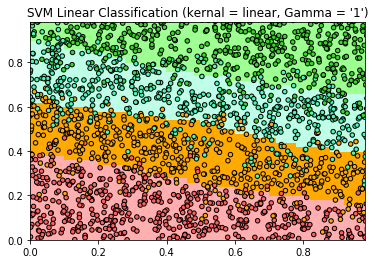

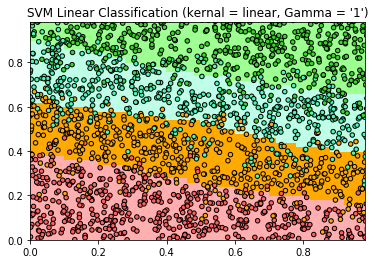

In [40]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='rbf',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = RBF, Gamma = '%s')"% (C_param))

plt.show()

In [41]:
# SVM dengan RBF KERNAL, C dan GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [42]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [43]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 25, 50],
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]})

In [44]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.90.


In [45]:
# Kernalized SVM machine 
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

1.00 is the accuracy of the SV Regressor


Kita dapat melihat bahwa regressor mesin vektor Dukungan kernalisasi memberikan akurasi yang lebih baik daripada SVM Regresor Linear (non kernal) sebelumnya. Bagaimanapun juga, perlu memahami data yang sedang dikerjakan sebelum mencoba berbagai metode. Teknik validasi silang berguna.

Saya selanjutnya dapat menambahkan teknik Validasi Silang untuk digunakan.

In [49]:
test = test.drop(['id'],axis=1)
test.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [50]:
test_mat = np.array(test)
test = scaler.fit_transform(test_mat)

In [51]:
clf4 = SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,Y_train)
prediction = clf4.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,2
1,2
2,2
3,2
4,2


In [52]:
prediction = svr2.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,1.443312
1,1.443312
2,1.443312
3,1.443312
4,1.443312


# Proses Training Support Vector Machine
Pada proses training menggunakan Support Vector Machine(SVM). Dimana saya mengklasifikasikan dan menentukan hyperplane. Dalam memperoleh hyperplane saya menggunakan kernel, yang mana kernel sebagai berikut:
1. Linear Kernel
2. RBF(Radial Basis Function) Kernel
Fungsi kernel ini sendiri sebagai membantu dalam mengklasifikasi sebuah data, bayangkan terdapat data yang mana data tersebut dua dimensi, pada dua dimensi data tersebut bersifat non-linear. Jadi untuk kasus mengklasifikasikan sangat tidak mungkin pada dua dimensi, kernel sangat membantu dimana meningkatkan dimensinya sehingga data dapat diklasifikasi.
Pada proses training pertama menggunakan Linear Kernel. Linear Kernel itu sendiri didefinisikan sebagai berikut:
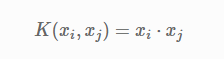

Setelah diproses training menggunakan Linear kernel maka diperoleh akurasi sebesar 98%.

Pada proses training selanjutnya menggunakan RBF(Radial Basis Function) atau biasa disebut dengan Gaussian Kernel. Ini didefinisikan sebagai berikut:
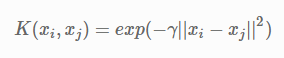

Setelah diproses training menggunakan RBF kernel hasil yang diperoleh memiliki nilai yang lebih baik dari pada menggunakan Linear kernel. Namun perlu ditekankan bahwa dalam proses training data menggunakan SVM tidak harus menggunakan RBF, karena nilai akurasi yang baik diperoleh dengan data yang baik atau istilahnya GARBAGE IN GARBAGE OUT.